# PYTHON PROGRAMMING: INTRODUCTION & DATABASES

📅 15/1/2023
🏛️ UTM


# Data Handling with [Pandas](https://pandas.pydata.org/)

Pandas contains data structures and data manipulation tools designed to make **data cleaning and analysis fast and easy in Python**.

It is often used in tandem with numerical computing tools like `NumPy` and `SciPy`, analytical modules like `statsmodels` and `scikit-learn`, and data visualization modules like `matplotlib`.

Since becoming an open source project in 2010, pandas has matured into a quite large library that’s applicable in a broad set of real-world use cases.

In this workshop, we use the following import convention for pandas
```
import pandas as pd
```
Thus, whenever you see `pd.` in code, it is referring to pandas.


## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string,
boolean, etc.). 

The DataFrame has both a row and column index. Under the hood, the data is stored as one or more two-dimensional blocks rather than a list or some other collection of one-dimensional arrays. 

In [ ]:
import pandas as pd

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)


In [ ]:
frame

For large DataFrames, the `head` method selects only the first five rows:

In [ ]:
frame.head()

If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:

In [ ]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

To check what are columns available in the dataframe:

In [ ]:
frame.columns

We can also check the number of rows and columns of the data.

In [ ]:
frame.shape

This means we have 6 rows and 4 columns.

It is common practise to use `info` method to get all these instead of run `columns` and `shape` methods.

In [ ]:
frame.info()

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute.

! It is recommended to keep the column names simple and try to avoid any whitespace


In [ ]:
frame['state']

In [ ]:
frame.state

In [ ]:
frame[['year', 'state']]

---
**Practice**

Select `year` and `pop`.

---
Columns can be modified by assignment. For example, the empty `debt` column could be assigned a scalar value or an array of values:

In [ ]:
frame['debt'] = 16.5

In [ ]:
frame

---
**Practice**

Create new column named `popmil` where it multiplies `pop` by 1 million.

In [ ]:
frame['popmil'] = frame['pop']*1000000
frame

---
Assigning a column that doesn’t exist will create a new column. 

As an example of `del`, I first add a new column of boolean values where the state column equals `Ohio`.

In [ ]:
frame['eastern'] = frame.state == 'Ohio'

In [ ]:
frame

New columns **cannot be created** with the `frame2.eastern` syntax.

In [ ]:
 del frame['eastern']

In [ ]:
 frame.columns

---
**Practice**

Delete column `popmil`


---
You can transpose the DataFrame (swap rows and columns) with similar syntax to a `NumPy` array:

In [ ]:
frame.T

## Selection with loc and iloc

For DataFrame label-indexing on the rows, we introduce the special indexing operators `loc` and `iloc`. They enable you to select a subset of the rows and columns from a DataFrame with NumPy-like notation using either `axis labels (loc)` or `integers (iloc)`.

In [ ]:
import numpy as np
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
index=['Ohio', 'Colorado', 'Utah', 'New York'],
columns=['one', 'two', 'three', 'four'])

In [ ]:
data

Indexing like this has a few special cases. First, slicing or selecting data with a boolean
array:


In [ ]:
data[:2]

In [ ]:
data['three'] > 5

In [ ]:
data[data['three'] > 5]

We’ll then perform some similar selections with integers using `iloc`:

In [ ]:
data

In [ ]:
data.iloc[2]

In [ ]:
data.iloc[2, [3, 0, 1]]


In [ ]:
data.iloc[[1, 2], [3, 0, 1]]

If you have many columns, you can use `info` method to easily get the column number.

In [ ]:
data.info()

##  Summarizing and Computing Descriptive Statistics

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                  [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [ ]:
df

### `sum`

In [ ]:
df.sum()

Passing `axis=1` sums by rows:

In [ ]:
df.sum(axis=1)


NA values are excluded unless the entire slice (row or column in this case) is NA.This can be disabled with the `skipna` option:

In [ ]:
df.mean(axis='columns', skipna=False)

Some methods, like `idxmin` and `idxmax`, return indirect statistics like the index value
where the minimum or maximum values are attained:

In [ ]:
df.idxmax()


### `describe`

Another type of method is neither a reduction nor an accumulation. `describe` is one such example, producing multiple summary statistics in one shot:

In [ ]:
df.describe()

##  Reading and Writing Data

Most of the time, we stored our data as spreadsheet or text files. 

Let us learn how to import data from an Excel file into `pandas`.

| Function | Description |
| --- | --- | 
| `read_csv` | Load delimited data from a file, URL, or file-like object; use comma as default delimiter | 
| `read_table` | Load delimited data from a file, URL, or file-like object; use tab ('\t') as default delimiter | 
| `read_excel` | Read tabular data from an Excel XLS or XLSX file | 
| `read_html` | Read all tables found in the given HTML document | 
| `read_json` | Read data from a JSON (JavaScript Object Notation) string representation | 
| `read_sas` | Read a SAS dataset stored in one of the SAS system’s custom storage formats | 
| `read_sql` | Read the results of a SQL query (using SQLAlchemy) as a pandas DataFrame |  
| `read_stata` | Read a dataset from Stata file format | 

In this workshop, we will focus on working with Excel files.
The data are originally from:
- https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur
- https://www.kaggle.com/datasets/tanboonhuei/malaysia-ipi

Some parts are modified for the purpose of this workshop. <br>
You may download them https://padlet.com/f4r4/pythondata

In [ ]:
import pandas as pd

In [ ]:
df_kl = pd.read_excel('kl_listings.xlsx')

In [ ]:
df_kl

---
**Practice**

Read `IPI2016.xlsx` and store as `df_ipi`.

---
With DataFrame objects, things are a bit more complex. You may want to drop rows
or columns that are all NA or only those containing any NAs. `dropna` by default **drops
any row containing a missing value**:

In [ ]:
df_kl_clean = df_kl.dropna()

In [ ]:
df_kl_clean

We can store/write the cleaned data as Excel file too.

In [ ]:
df_kl_clean.to_excel("kl_listings_clean.xlsx")

---
**Practice**

1. Filter the dataframe `df_kl` to include `Price` greater than RM 10 millions.
2. Save as excel file name `kl_10mil.xlsx`



In the next part, we will explore how to perform data visualisation in Python.

---

# Data Visualisation

## [Matplotlib](https://matplotlib.org/)
*   The most basic plotting library in Python.
*   Very similar to Matlab plotting.

In [ ]:
import numpy as np
x = np.linspace(-5,7,100)
y = x**3 -2*x**2 -29*x - 42

import matplotlib.pyplot as plt
plt.plot(x,y) 

## [Seaborn](https://seaborn.pydata.org/)
*   Build on top of matplotlib.
*   Suitable for statistical data visualisation.

Example of seaborn line plot

In [ ]:
import seaborn as sns
sns.set_theme()
sns.set_context("talk")
sns.lineplot(x,y)

## [Bokeh](https://bokeh.org/)
*   Best for interactive data visualisation.
*   Comes with Pan, Box Zoom, Wheel Zoom, Save, Reset and Learn More buttons by default.

In [ ]:
# for plotting to appear in this notebook
import bokeh.io
bokeh.io.output_notebook()

# to plot
import bokeh.plotting as bp
fig = bp.figure()
fig.line(x, y)

bp.show(fig)


## [Plotly](https://plotly.com/python/)
*   Best for interactive data visualisation in web application.
*   Recognizes mouse-over and cursor-click events.

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

---
## Plotting with Seaborn (and Matplotlib)

Let us start with importing `seaborn`

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

From now on, we can call `seaborn` as `sns` in our code.<br>
Behind visualisation, there are data.<br>
For today, we will use dataset from `diamonds.xlsx`

### Dataset

|Variable| 	Description| 	Values|
| --- | --- | --- |
|price 	|price in US dollars| 	USD 326 to USD 18,823|
|carat | 	weight of the diamond |	0.2-5.01 |
|cut |	quality of the cut |	Fair, Good, Very Good, Premium, Ideal|
|color |	diamond color |	J (worst) to D (best)|
|clarity |	measurement of how clear the diamond is |	I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)|
|x |	length in mm |	0-10.74|
|y | width in mm |	0-58.9|
|z |	depth in mm |	0-31.8|
|depth |	total depth percentage| 	43-79|
|table |	width of top of diamond relative to widest point |	43-95 |

In [ ]:
import pandas as pd

df = pd.read_excel("diamonds.xlsx")

In [ ]:
df.info()

---
### Bar chart 

In [ ]:
sns.barplot(x='color', y='price', data = df)


**Practice**

How about quality of `cut` and `price` ?

In [ ]:
sns.barplot(x = '', y = '' , data = df)

---
###  Horizontal bar chart

Instead of `price` vs `color`, we can have a horizontal bar chart where `color` vs `price`.


In [ ]:
sns.barplot(x='price', y='color', data = df, ci = None)

**Practice**

How about quality of `cut` and `price` as horizontal bar chart?

In [ ]:
sns.barplot(x='', y='', data = df, ci = None)

---
### Grouped bar chart

How about we create a bar chart that are grouped by quality of cut.

Hint: `hue`, `cut`

In [ ]:
sns.barplot(x='color', y='price', hue='cut', data = df, ci=None)
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

Hmmm too crowded ? Dodge?

Hint: `dodge`, `False`

### Stacked bar chart

In [ ]:
sns.barplot(x='color', y='price', hue='cut', data = df, dodge = False, ci = None)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

### Scatter plot

Let us explore is it true the heavier a diamond, the higher its price.

Hint: `carat`, `price`

In [ ]:
sns.scatterplot(x='carat', y='price', data=df)

Diamonds of carat 1 can have a price as expensive as carat 5. <br>
There must be other factor contributing to the price. 

**Practice** <br>
Does clarity of a diamond play a role? Let us figure out. <br>
Hint: `hue`, `clarity`

In [ ]:
sns.scatterplot(x='carat', y='price', hue=  , data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

Too many points overlapping each other.

**Practice**<br>
Let us try focusing on best and worse clarity. <br>
Then, we see how quality of cut affecting the price.

Hint: `style`, `cut`

In [ ]:
claritylist = ['IF', 'I1']
dataclarity = df[df['clarity'].isin(claritylist)]

sns.scatterplot(x='carat', y='price', hue = 'clarity', style='cut', data=dataclarity)

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

###  Box plot

Let's check out the distribution of price by quality of cut.

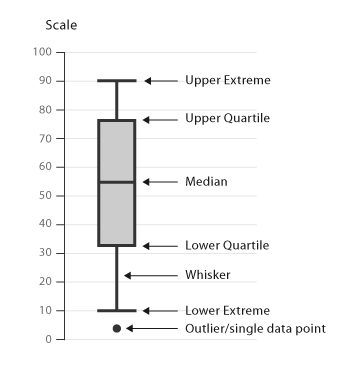

Source: https://data36.com/

In [ ]:
sns.boxplot(x='cut', y='price', data=df)

**Practice**

Create a box plot for `price` vs `color`

---
### Violin plot

In [ ]:
sns.violinplot(x='cut', y='price', data=df)

**Practice**

Create a violin plot for `price` vs `color`

---
### Swarm plot

In [ ]:
sns.swarmplot(x='cut', y='price', data=dataclarity)

Ooopps. Some ticks on x-axis are overlap. We can fix this by rotating them.

In [ ]:
sns.swarmplot(x='cut', y='price', data=dataclarity)
plt.xticks(rotation=45)

## High Resolution Figure

Dots per inches (dpi) determines how many pixels the figure comprises. The default dpi in matplotlib is 100.

The higher the dpi, the clearer the picture but the size of the file usually be bigger.

Type of image
* .png
* .jpg
* .svg
* .pdf

In [ ]:
fig1 = sns.barplot(x='price', y='color', data = df, ci = None)
fig1.figure.savefig('output_figure.png',dpi=400)

**Practice**

1. Create a grouped bar chart called `fig2`:
```
fig2 = sns.barplot(x='color', y='price', data = df, ci = None)
```

2. Save `fig2` as `output_fig2.jpg` with `dpi = 120`.


That's all. Enjoy coding with Python!